# Warung Kaik

## 1. Library Declaration

In [1]:
# Library manipulation datafrane
# ------------------------------
import pandas as pd
from pandas import concat
from pandas import read_csv
from pandas import read_excel
from pandas_datareader import DataReader

# Library manipulation data array
# -------------------------------
import numpy as np
from numpy import concatenate
from numpy import array

# Library manipulation datetime
# ------------------------------
import time
from datetime import datetime

# Library data visualization
# --------------------------
import seaborn as sns
from matplotlib import pyplot
from matplotlib import pyplot as plt

# Library time series analysis
# ----------------------------
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
        
# Library preprocessing data
# --------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Library to make models prediction 
# ---------------------------------
import itertools
import tensorflow as tf
from keras.utils import Sequence
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.optimizers import Adam, Adamax, RMSprop, SGD

# Library for evaluation models
# -----------------------------
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## 2. Data collection

In [2]:
# set computation time
start = time.time()

In [3]:
# set number seed
tf.random.set_seed(7)

In [4]:
# load dataset
dataset = read_csv("dataset/BTC-USD.csv", parse_dates=['Date']);

In [5]:
# view metadata dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2896 non-null   datetime64[ns]
 1   Open       2896 non-null   float64       
 2   High       2896 non-null   float64       
 3   Low        2896 non-null   float64       
 4   Close      2896 non-null   float64       
 5   Adj Close  2896 non-null   float64       
 6   Volume     2896 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 158.5 KB


In [6]:
# look statistical summary
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2.896000e+03
mean,13149.534783,13485.262436,12773.448934,13153.611024,13153.611024,1.673386e+10
std,16409.155989,16830.044971,15921.479471,16403.946301,16403.946301,2.020561e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,762.625244,773.658493,750.296265,764.113251,764.113251,1.304910e+08
50%,7203.029297,7360.274659,7034.664795,7206.265625,7206.265625,7.769794e+09
75%,17729.801270,18182.687988,16685.660644,17709.528809,17709.528809,2.860266e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-09,361.894989,363.066986,344.950989,352.218994,352.218994,32915500
1,2014-12-10,352.204987,352.384003,346.364990,346.364990,346.364990,16427700
2,2014-12-11,344.339996,361.356995,338.763000,350.506012,350.506012,32431300
3,2014-12-12,350.833008,352.983002,349.290985,352.541992,352.541992,16989800
4,2014-12-13,352.381012,352.381012,346.588013,347.376007,347.376007,11675900
...,...,...,...,...,...,...,...
2891,2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607
2892,2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606
2893,2022-11-10,15883.158203,18054.312500,15834.018555,17586.771484,17586.771484,83202283721
2894,2022-11-11,17583.251953,17650.943359,16543.482422,17034.292969,17034.292969,55871616488


## 3. Exploratory Data Analysis 

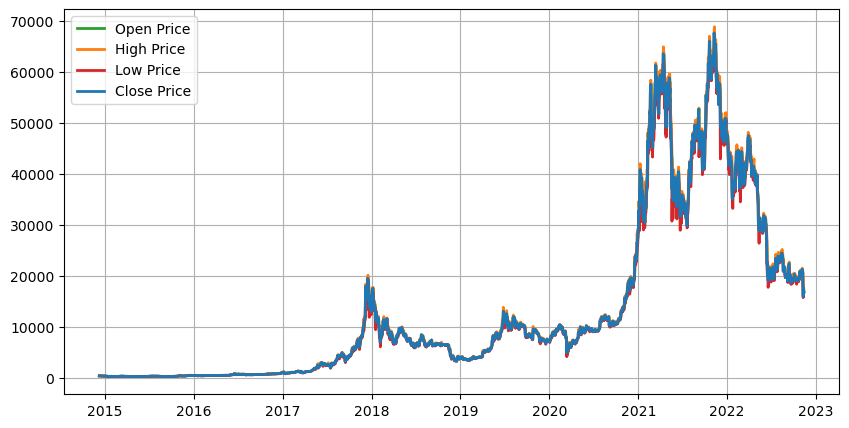

In [8]:
# create a frame
fig, ax = plt.subplots(figsize=(10,5))

# make a time series plot
ax.plot(dataset["Date"], dataset["Open"], color="tab:green", label="Open Price", linewidth=2)
ax.plot(dataset["Date"], dataset["High"], color="tab:orange", label="High Price", linewidth=2)
ax.plot(dataset["Date"], dataset["Low"], color="tab:red", label="Low Price", linewidth=2)
ax.plot(dataset["Date"], dataset["Close"], color="tab:blue", label="Close Price", linewidth=2)

# setting labes
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

## 4. Prepocessing Data

- fetaure selection

In [9]:
# choose a feature
data = dataset[["Close"]]

In [10]:
data = data.values

In [11]:
np.round(data[:5],7)

array([[352.218994],
       [346.36499 ],
       [350.506012],
       [352.541992],
       [347.376007]])

In [12]:
data.shape

(2896, 1)

- normalization data

In [13]:
# normalized min-max
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)

In [14]:
np.round(scaled[:5],7)

array([[0.0025838],
       [0.0024969],
       [0.0025583],
       [0.0025885],
       [0.0025119]])

In [15]:
scaled.shape

(2896, 1)

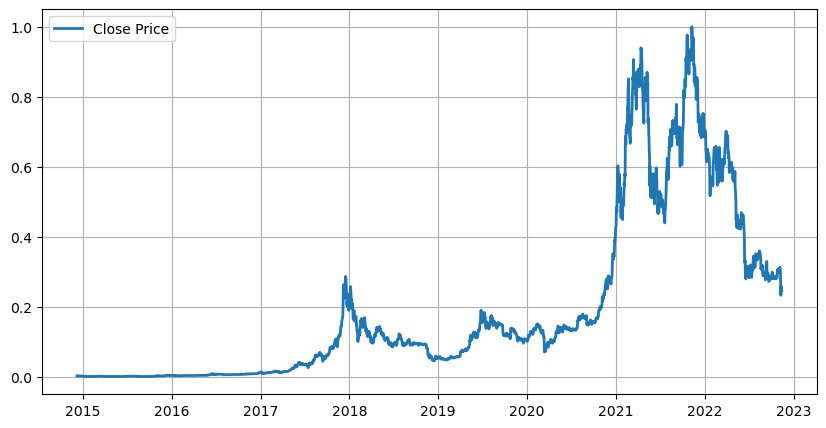

In [16]:
# create a frame
fig, ax = plt.subplots(figsize=(10, 5))

# make a time series plot
ax.plot(dataset["Date"], scaled, color="tab:blue", label="Close Price", linewidth=2)

# setting labes
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

## 5. Splitting Data

In [17]:
# create train data and test data
train_data, test_data = train_test_split(scaled, train_size=0.80, test_size=0.20, shuffle=False)

In [18]:
# view result train data
np.round(train_data[:5],5)

array([[0.00258],
       [0.0025 ],
       [0.00256],
       [0.00259],
       [0.00251]])

In [19]:
train_data.shape

(2316, 1)

In [20]:
# view result test data
np.round(test_data[:5],5)

array([[0.88613],
       [0.9397 ],
       [0.93386],
       [0.93689],
       [0.91105]])

In [21]:
test_data.shape

(580, 1)

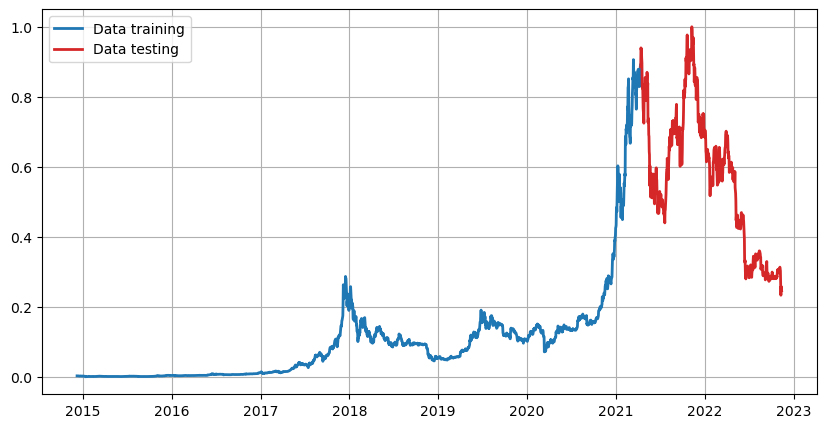

In [22]:
# create a frame
fig, ax = plt.subplots(figsize=(10,5))

# make a time series plot
ax.plot(dataset[["Date"]].iloc[0:len(train_data)], train_data, color="tab:blue", label="Data training", linewidth=2)
ax.plot(dataset[["Date"]].iloc[len(train_data):len(dataset)], test_data, color="tab:red", label="Data testing", linewidth=2)

# setting labes
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

## 6. Supervised Learning

In [23]:
# convert an array of values into a dataset matrix

# function for supervised learning
def create_dataset(look_back, dataset):
    
    # declare variable X and Y
    dataX = []
    dataY = []
    
    # for loop for create supervised learning
    for i in range(look_back, len(dataset)):
        
        # insert value X and Y 
        dataX.append(dataset[i-look_back:i, 0])
        dataY.append(dataset[i, 0])
        
    # return value X and Y
    return np.array(dataX), np.array(dataY)

In [24]:
# process supervised learning
look_back = 60
x_train, y_train = create_dataset(look_back, train_data)
x_test, y_test = create_dataset(look_back, test_data)

In [25]:
print(x_train.shape, y_train.shape)

(2256, 60) (2256,)


In [26]:
print(x_test.shape, y_test.shape)

(520, 60) (520,)


- check result train data after supervised learning

In [27]:
result_train_data = pd.concat([pd.DataFrame(x_train), pd.DataFrame(y_train, columns=['result'])], axis=1)

In [28]:
result_train_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,result
0,0.002584,0.002497,0.002558,0.002589,0.002512,0.002575,0.002482,0.002210,0.002102,0.001978,...,0.000822,0.000717,0.000584,0.000725,0.000892,0.000730,0.000723,0.000579,0.000655,0.000737
1,0.002497,0.002558,0.002589,0.002512,0.002575,0.002482,0.002210,0.002102,0.001978,0.002074,...,0.000717,0.000584,0.000725,0.000892,0.000730,0.000723,0.000579,0.000655,0.000737,0.000672
2,0.002558,0.002589,0.002512,0.002575,0.002482,0.002210,0.002102,0.001978,0.002074,0.002253,...,0.000584,0.000725,0.000892,0.000730,0.000723,0.000579,0.000655,0.000737,0.000672,0.000623
3,0.002589,0.002512,0.002575,0.002482,0.002210,0.002102,0.001978,0.002074,0.002253,0.002118,...,0.000725,0.000892,0.000730,0.000723,0.000579,0.000655,0.000737,0.000672,0.000623,0.000619
4,0.002512,0.002575,0.002482,0.002210,0.002102,0.001978,0.002074,0.002253,0.002118,0.002282,...,0.000892,0.000730,0.000723,0.000579,0.000655,0.000737,0.000672,0.000623,0.000619,0.000610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,0.580036,0.574656,0.682879,0.687103,0.663910,0.708297,0.702295,0.696369,0.720286,0.708827,...,0.854328,0.871653,0.871670,0.874296,0.878577,0.852157,0.869292,0.873733,0.860890,0.829083
2252,0.574656,0.682879,0.687103,0.663910,0.708297,0.702295,0.696369,0.720286,0.708827,0.727448,...,0.871653,0.871670,0.874296,0.878577,0.852157,0.869292,0.873733,0.860890,0.829083,0.862842
2253,0.682879,0.687103,0.663910,0.708297,0.702295,0.696369,0.720286,0.708827,0.727448,0.771211,...,0.871670,0.874296,0.878577,0.852157,0.869292,0.873733,0.860890,0.829083,0.862842,0.861671
2254,0.687103,0.663910,0.708297,0.702295,0.696369,0.720286,0.708827,0.727448,0.771211,0.764248,...,0.874296,0.878577,0.852157,0.869292,0.873733,0.860890,0.829083,0.862842,0.861671,0.884645


- check result test data after supervised learning

In [29]:
result_test_data = pd.concat([pd.DataFrame(x_test), pd.DataFrame(y_test, columns=['result'])], axis=1)

In [30]:
result_test_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,result
0,0.886133,0.939703,0.933859,0.936891,0.911053,0.897861,0.831565,0.824265,0.835376,0.797285,...,0.554946,0.579187,0.544843,0.524922,0.529529,0.495374,0.494067,0.551532,0.541997,0.551373
1,0.939703,0.933859,0.936891,0.911053,0.897861,0.831565,0.824265,0.835376,0.797285,0.765472,...,0.579187,0.544843,0.524922,0.529529,0.495374,0.494067,0.551532,0.541997,0.551373,0.524931
2,0.933859,0.936891,0.911053,0.897861,0.831565,0.824265,0.835376,0.797285,0.765472,0.755550,...,0.544843,0.524922,0.529529,0.495374,0.494067,0.551532,0.541997,0.551373,0.524931,0.577541
3,0.936891,0.911053,0.897861,0.831565,0.824265,0.835376,0.797285,0.765472,0.755550,0.740076,...,0.524922,0.529529,0.495374,0.494067,0.551532,0.541997,0.551373,0.524931,0.577541,0.594170
4,0.911053,0.897861,0.831565,0.824265,0.835376,0.797285,0.765472,0.755550,0.740076,0.724545,...,0.529529,0.495374,0.494067,0.551532,0.541997,0.551373,0.524931,0.577541,0.594170,0.596957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.314638,0.319081,0.320397,0.329318,0.298546,0.297720,0.289709,0.290768,0.296036,0.285529,...,0.303575,0.301500,0.301344,0.296510,0.297259,0.311167,0.313177,0.307891,0.303088,0.272496
516,0.319081,0.320397,0.329318,0.298546,0.297720,0.289709,0.290768,0.296036,0.285529,0.287378,...,0.301500,0.301344,0.296510,0.297259,0.311167,0.313177,0.307891,0.303088,0.272496,0.233016
517,0.320397,0.329318,0.298546,0.297720,0.289709,0.290768,0.296036,0.285529,0.287378,0.277683,...,0.301344,0.296510,0.297259,0.311167,0.313177,0.307891,0.303088,0.272496,0.233016,0.258332
518,0.329318,0.298546,0.297720,0.289709,0.290768,0.296036,0.285529,0.287378,0.277683,0.272587,...,0.296510,0.297259,0.311167,0.313177,0.307891,0.303088,0.272496,0.233016,0.258332,0.250134


- reshape input to be [samples, time steps, features]

In [31]:
# reshape input train data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# view dimention train data
print(x_train.shape)

(2256, 60, 1)


In [32]:
# reshape input train data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# view dimention test data
print(x_test.shape)

(520, 60, 1)


## 7. Modeling LSTM

### 7.1 Vanila-LSTM

In [33]:
tf.random.set_seed(7)

In [34]:
# The LSTM-RNN architecture
model_1 = tf.keras.Sequential([
    
    # The input layer
    tf.keras.layers.LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)),
    
    tf.keras.layers.Dropout(0.15),
    
    # The output layer
    tf.keras.layers.Dense(1)
])

In [35]:
# Compile the model LSTM
model_1.compile(
    optimizer='adam', loss='mean_squared_error'
)

In [36]:
# fit network
history_1 = model_1.fit(x_train, y_train, batch_size=8, epochs=50, verbose=0, use_multiprocessing=True, shuffle=False)

In [37]:
# view architecture lstm
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [38]:
# process predictions
predictions_1 = model_1.predict(x_test)

17/17 [==============================] - 1s 6ms/step


In [39]:
# view output predictions
np.round(predictions_1[:5],5)

array([[0.58009],
       [0.58706],
       [0.57094],
       [0.5957 ],
       [0.61929]], dtype=float32)

### 7.2 Stacked-LSTM

### 7.3 Bidirectional-LSTM

### 7.4 SB-LSTM

## 8. Evaluation Model

### 8.1 Evaluation Vanila-LSTM

- MAE (Mean Absolute Error)

In [40]:
mae_1 = mean_absolute_error(y_test, predictions_1)
print('Test MAE : %.4f' % mae_1)

Test MAE : 0.0356


- MSE (Mean Squared Error)

In [41]:
mse_1 = mean_squared_error(y_test, predictions_1)
print('Test MSE: %.4f' % mse_1)

Test MSE: 0.0016


- MAPE (Mean Absolute Percentage Error)

In [42]:
mape_1 = mean_absolute_percentage_error(y_test, predictions_1)
print('Test MAPE: %.4f' % mape_1)

Test MAPE: 0.0821


### 8.2 Evaluation Stacked-LSTM

### 8.3 Evaluation Bidirectional-LSTM

### 8.4 Evaluation SB-LSTM

### 8.5 Evaluation All Model

## 9. Data visualization

### 9.1 Visualization Lost Function

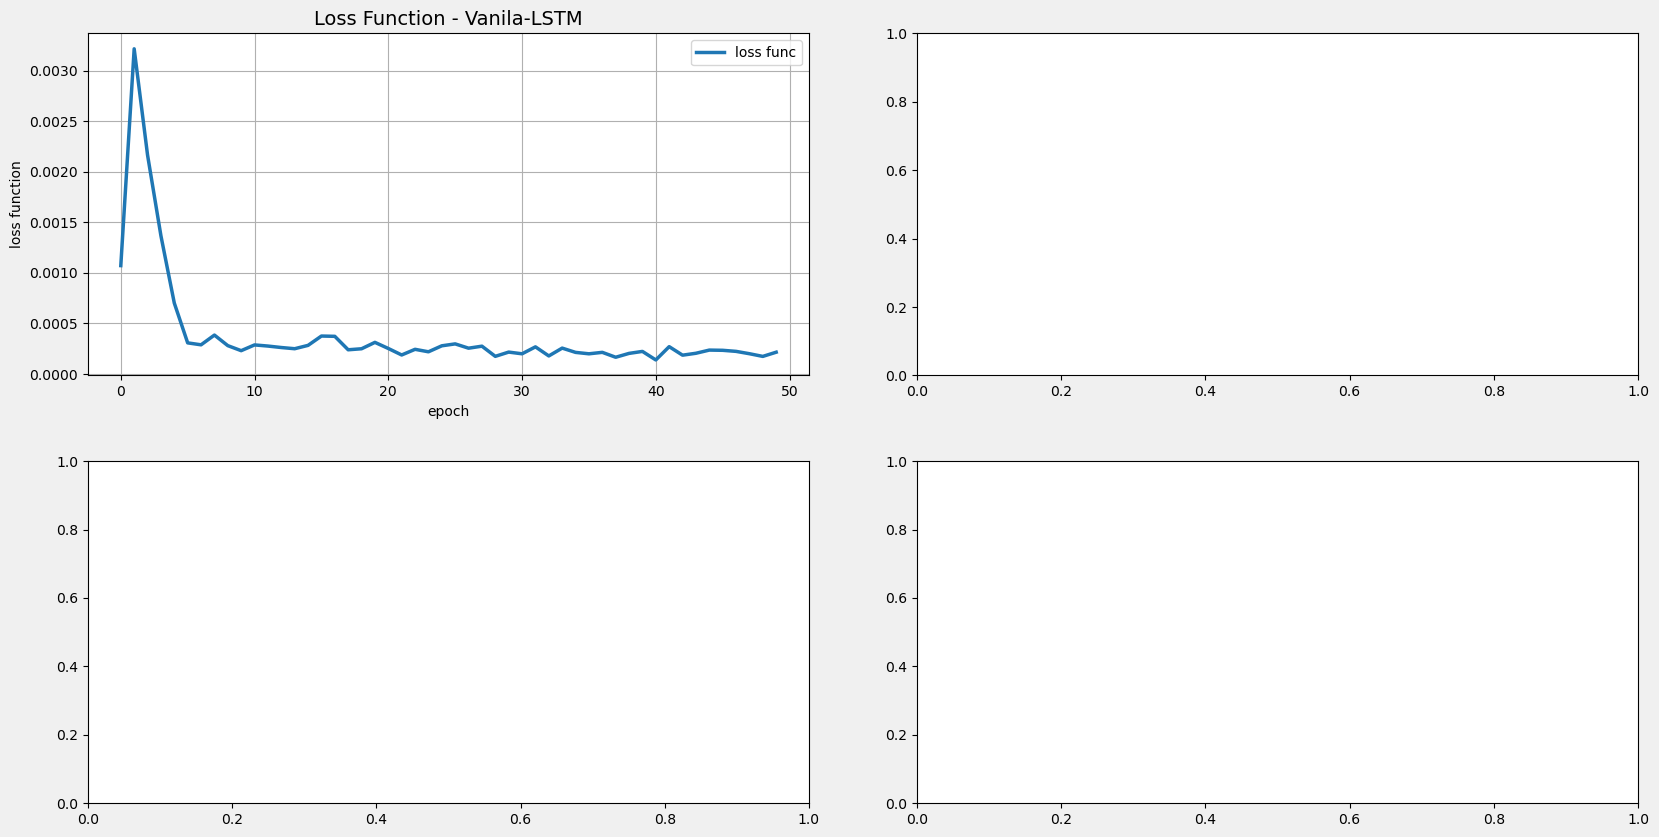

In [43]:
# create a frame
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, facecolor="#f0f0f0", figsize=(20, 10))


# result loss function
ax1.plot(history_1.history['loss'], color="tab:blue", label="loss func", linewidth=2.5)

# setting labes
ax1.set_title("Loss Function - Vanila-LSTM", fontsize=14)
ax1.set_xlabel("epoch", fontsize=10)
ax1.set_ylabel("loss function", fontsize=10)
ax1.legend(loc='upper right')
ax1.grid(True)
# ----------------------------------------------------------------------------------------------------

# set the spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.25)

plt.show()

### 9.2 Visualization Evaluations

### 9.3 Visualization Result Predictions

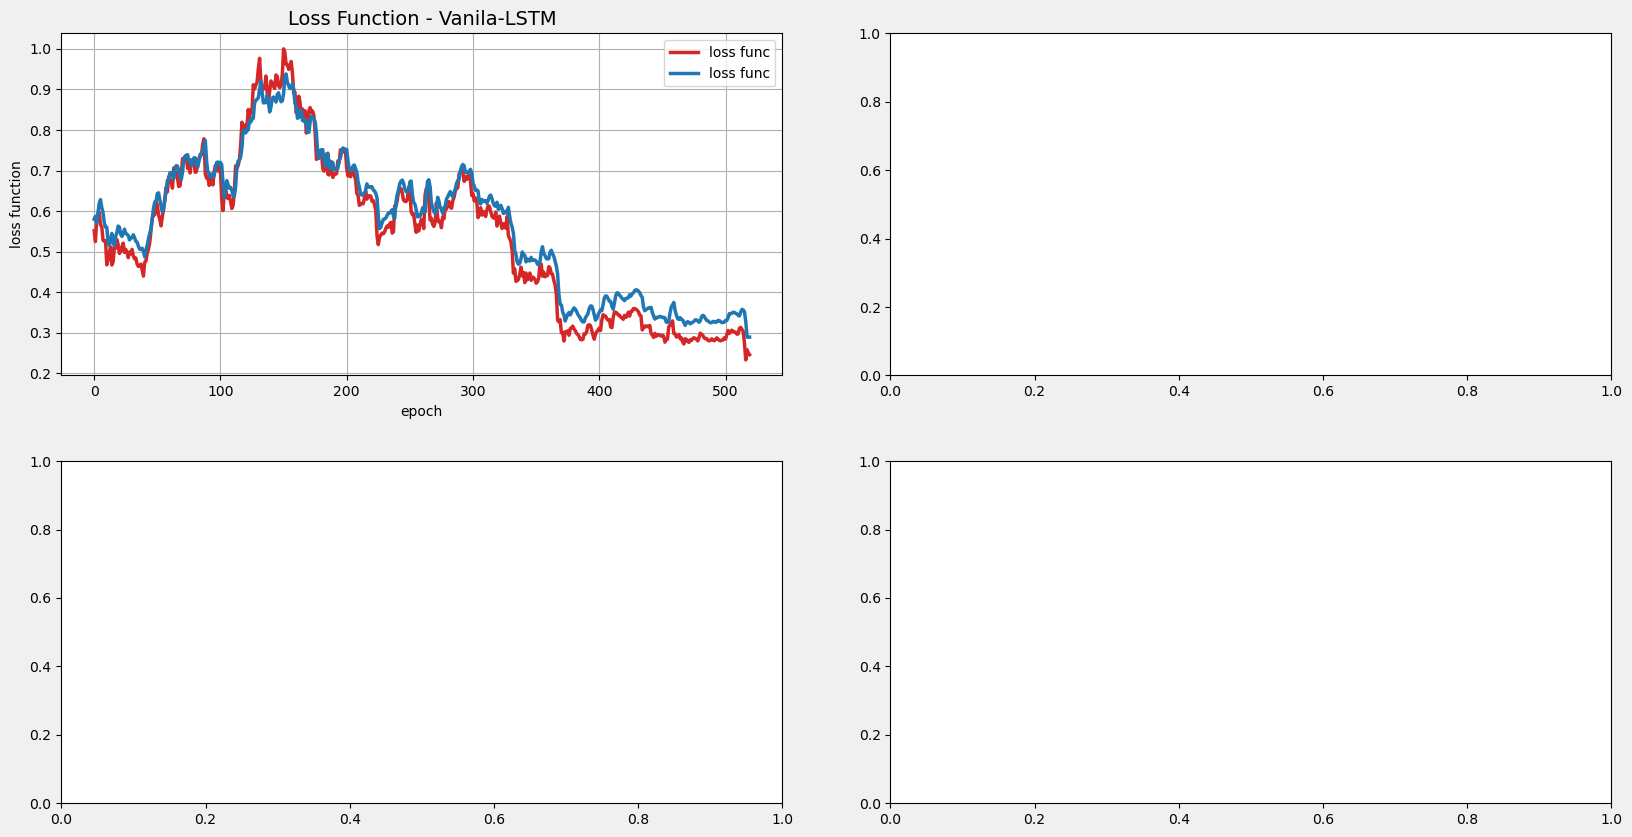

In [44]:
# create a frame
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, facecolor="#f0f0f0", figsize=(20, 10))

# result predictions Valina-LSTM
ax1.plot(y_test, color="tab:red", label="loss func", linewidth=2.5)
ax1.plot(predictions_1, color="tab:blue", label="loss func", linewidth=2.5)

# setting labes
ax1.set_title("Loss Function - Vanila-LSTM", fontsize=14)
ax1.set_xlabel("epoch", fontsize=10)
ax1.set_ylabel("loss function", fontsize=10)
ax1.legend(loc='upper right')
ax1.grid(True)
# ----------------------------------------------------------------------------------------------------

# set the spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.25)

plt.show()